In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [14]:
df=pd.read_csv(r"C:\Users\yedla\Downloads\SMA_data (1).csv")
df.head()

,Datetime,SMA
0,2018-01-01 04:34:10.320672,6864.691463
1,2018-01-01 12:37:36.596064,6864.689664
2,2018-01-01 20:31:55.898112,6864.688585
3,2018-01-02 05:42:49.014720,6864.684927
4,2018-01-02 12:13:01.263360,6864.682858


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2291 entries, 0 to 2290
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  2291 non-null   object 
 1   SMA       2291 non-null   float64
dtypes: float64(1), object(1)
memory usage: 35.9+ KB


In [18]:
df.describe()

,SMA
count,2291.000000
mean,6867.611447
std,4.251829
min,6863.806871
25%,6864.211480
50%,6864.558916
75%,6872.988868
max,6873.482523


In [20]:
df['Date_time']=pd.to_datetime(df['Datetime'])

In [22]:
df['Date_time'].dtype

dtype('<M8[ns]')

In [24]:
df.head()

,Datetime,SMA,Date_time
0,2018-01-01 04:34:10.320672,6864.691463,2018-01-01 04:34:10.320672
1,2018-01-01 12:37:36.596064,6864.689664,2018-01-01 12:37:36.596064
2,2018-01-01 20:31:55.898112,6864.688585,2018-01-01 20:31:55.898112
3,2018-01-02 05:42:49.014720,6864.684927,2018-01-02 05:42:49.014720
4,2018-01-02 12:13:01.263360,6864.682858,2018-01-02 12:13:01.263360


In [26]:
df['Date']=df['Date_time'].dt.date

In [28]:
df['Date'].dtype

dtype('O')

In [30]:
df.drop(['Datetime'],axis=1,inplace=True)

In [32]:
df.head()

,SMA,Date_time,Date
0,6864.691463,2018-01-01 04:34:10.320672,2018-01-01
1,6864.689664,2018-01-01 12:37:36.596064,2018-01-01
2,6864.688585,2018-01-01 20:31:55.898112,2018-01-01
3,6864.684927,2018-01-02 05:42:49.014720,2018-01-02
4,6864.682858,2018-01-02 12:13:01.263360,2018-01-02


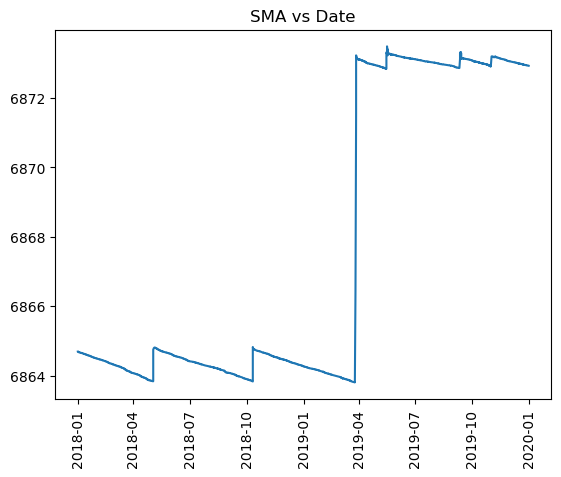

In [34]:
plt.plot(df['Date'],df['SMA'])
plt.xticks(rotation=90)
plt.title("SMA vs Date")
plt.show()

##### According to data. Manuevers occured at following dates
1. 2018-05-03 
2. 2018-10-11
3. 2019-03-27
4. 2019-05-17
5.2019-09-11
5. 2019-11-01
#### The number of days between two consecutive dates are 161, 167,51,117,51 so is there any pattern?.In case of average number of occurance of manuevers between two dates is constant. Then we can probably model them using exponential distribution.

C:\Users\yedla\AppData\Local\Temp\ipykernel_17184\1527518730.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SMA'])
C:\Users\yedla\anaconda3_new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


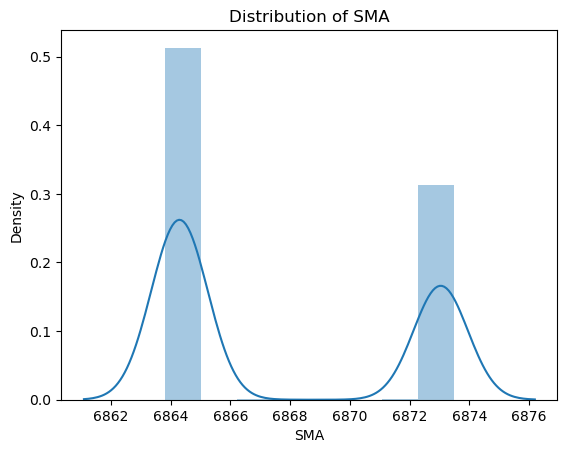

In [36]:
# distribution of the data
sns.distplot(df['SMA'])
plt.title("Distribution of SMA")
plt.show()

#### Observations
1.	When there sudden jump then there is a maneuvers. 
2.	In general the SMA value is decreasing with constant slope ,but when maneuvers occurs there is a sudden jump, again the value decreasing from there …


#### Huerstic Approach:
    Now the question is how to find this jump?
1.	For every value starting from beginning , subtract the current value from its previous, when the value is positive meaning there is jump…

In [43]:
# Calculate differences between consecutive SMA values
df['SMA_diff'] = df['SMA'].diff()
df['SMA_diff']

0            NaN
1      -0.001799
2      -0.001079
3      -0.003658
4      -0.002069
          ...   
2286   -0.001594
2287   -0.001624
2288   -0.001233
2289   -0.003548
2290   -0.000872
Name: SMA_diff, Length: 2291, dtype: float64

In [45]:
# Lets consider a threshold for detecting jumps
threshold = 0.1
# Identifying jumps
df['is_jump'] = df['SMA_diff'] > threshold

In [47]:
df.loc[df['is_jump']==True]

,SMA,Date_time,Date,SMA_diff,is_jump
384,6864.749568,2018-05-03 12:01:31.056960,2018-05-03,0.911916,True
871,6864.695930,2018-10-11 13:37:04.556640,2018-10-11,0.862714,True
872,6864.824196,2018-10-11 19:59:53.915424,2018-10-11,0.128266,True
1421,6866.447702,2019-03-26 04:53:33.243936,2019-03-26,2.640831,True
1422,6871.548711,2019-03-27 04:34:36.436800,2019-03-27,5.101009,True
1423,6873.222542,2019-03-27 20:25:37.599168,2019-03-27,1.673831,True
1583,6873.309430,2019-05-15 10:44:36.864096,2019-05-15,0.472244,True
1585,6873.480508,2019-05-16 16:43:16.023072,2019-05-16,0.223560,True
1588,6873.391750,2019-05-17 11:36:17.564832,2019-05-17,0.168035,True
1944,6873.117522,2019-09-11 04:28:22.151136,2019-09-11,0.259556,True


In [49]:
# Get the dates corresponding to the jumps
jump_dates = df.loc[df['is_jump'], 'Date']
print("Dates with jumps:")
print(jump_dates)

Dates with jumps:
384     2018-05-03
871     2018-10-11
872     2018-10-11
1421    2019-03-26
1422    2019-03-27
1423    2019-03-27
1583    2019-05-15
1585    2019-05-16
1588    2019-05-17
1944    2019-09-11
1945    2019-09-11
2120    2019-11-01
Name: Date, dtype: object


##### But here the question is how to quantify this jump? Is 0.04 is also considered as jump?

##### Comment:
How do we say whether a jump is manuvers or not🤔. Because it is clear that not every jump is Manuevers.

#### Observations-2:
1. If there are consecutive or identical dates with positive values, we only consider the last date when the SMA starts decreasing again as a maneuver point.
Example: 2019-03-26,  2019-03-23,  2019-03- these dates are consecutive and have positive SMA_diff. But they considered maneuver at 2019-03-27. Same applies for 2019-05-15, 2019-05-16,  2019-05-17.
2. Hence we can conclude that manuevers occurs when there is shift jump in SMA and followed by decreasing of SMA.
3. Now we are required to find out the dates where SMA_diff is positive and the immediate next date has negative SMA_diff or almost same SMA_diff.


In [65]:
#lets shift the SMA_diff by one value above 
df['SMA_diff_shifted'] = df['SMA_diff'].shift(-1)

# Identify dates where SMA_diff is positive and the next immediate SMA_diff is negative
maneuver_dates = df.loc[(df['is_jump']) & (df['SMA_diff_shifted'] < 0), 'Date']
print(maneuver_dates)

872     2018-10-11
1423    2019-03-27
1583    2019-05-15
1588    2019-05-17
2120    2019-11-01
Name: Date, dtype: object


In [67]:
df.loc[df['is_jump']==True]

,SMA,Date_time,Date,SMA_diff,is_jump,SMA_diff_shifted
384,6864.749568,2018-05-03 12:01:31.056960,2018-05-03,0.911916,True,0.043115
871,6864.695930,2018-10-11 13:37:04.556640,2018-10-11,0.862714,True,0.128266
872,6864.824196,2018-10-11 19:59:53.915424,2018-10-11,0.128266,True,-0.067372
1421,6866.447702,2019-03-26 04:53:33.243936,2019-03-26,2.640831,True,5.101009
1422,6871.548711,2019-03-27 04:34:36.436800,2019-03-27,5.101009,True,1.673831
1423,6873.222542,2019-03-27 20:25:37.599168,2019-03-27,1.673831,True,-0.060901
1583,6873.309430,2019-05-15 10:44:36.864096,2019-05-15,0.472244,True,-0.052482
1585,6873.480508,2019-05-16 16:43:16.023072,2019-05-16,0.223560,True,0.002015
1588,6873.391750,2019-05-17 11:36:17.564832,2019-05-17,0.168035,True,-0.105899
1944,6873.117522,2019-09-11 04:28:22.151136,2019-09-11,0.259556,True,0.143938


##### Note: Here we are unable to capture every manuevers. because we have considered SMA_diff_shifted to be less than 0. But there are Manuevers, even when SMA_diff_shifted is positive (very small). Hence there is a need to consider a threshold in order to capture all Manuevers.


In [70]:
# Lets consider threshold value to be 0.05
maneuver_dates = df.loc[(df['is_jump']) & (df['SMA_diff_shifted'] < 0.05), 'Date']
print(maneuver_dates)

384     2018-05-03
872     2018-10-11
1423    2019-03-27
1583    2019-05-15
1585    2019-05-16
1588    2019-05-17
1945    2019-09-11
2120    2019-11-01
Name: Date, dtype: object


#### Lets explore if we can solve using ML techniques

Side Note:
1. Machine learning algorithms are best approximating functions. Hence if we can fit the data to a function we can find out manuerves.
#### Objective:
1.	To determine/find the best approximator(function f(x)) using machine learning. Here x refers to SMA.

In [73]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### Approach-1 Supervised learning (classification):
1. Lets consider manuever detection to be binary classification problem, where we classify each datapoint to be manuever or not.
2. But now the question is what features are we going to consider? For now lets consider SMA, SMA_diff which we computed earlier as features.
3. And based on the manuever data given lets label each data point to be either manuever or not. And then we will train the model.

In [76]:
#Label the target variable
idx=[384,872,1423,1588,1945,2120]
df['target']=0
df.loc[idx, 'target'] = 1

In [78]:
df['target'].value_counts()

target
0    2285
1       6
Name: count, dtype: int64

##### Clearly it is a imbalanced dataset.

#####  Comments
The given data is highly imbalanced. Let's try to oversample/undersample the observational data and train the classifier on the over sampled data

In [82]:
df.sample(5)

,SMA,Date_time,Date,SMA_diff,is_jump,SMA_diff_shifted,target
354,6863.885279,2018-04-24 12:48:39.009312,2018-04-24,-0.003627,False,-0.002518,0
1182,6864.209457,2019-01-12 12:25:46.773408,2019-01-12,-0.000779,False,-0.000090,0
1958,6873.133281,2019-09-17 19:54:37.598112,2019-09-17,-0.000391,False,-0.001474,0
890,6864.718597,2018-10-18 12:24:29.723616,2018-10-18,-0.002249,False,-0.000750,0
2225,6873.002070,2019-12-13 02:42:28.577664,2019-12-13,-0.002015,False,-0.002045,0


In [84]:
df.dropna(inplace=True)

In [86]:
y=df.loc[:,['target']]


In [88]:
X=df.loc[:,['SMA_diff','SMA_diff_shifted']]

In [90]:
X.head()

,SMA_diff,SMA_diff_shifted
1,-0.001799,-0.001079
2,-0.001079,-0.003658
3,-0.003658,-0.002069
4,-0.002069,-0.001589
5,-0.001589,-0.002848


In [94]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)


In [96]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42)

In [98]:
print(X_train.shape,X_test.shape)

(3652, 2) (914, 2)


In [100]:
print(y_train.shape,y_test.shape)

(3652, 1) (914, 1)


In [119]:
# Logistic model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,precision_score,recall_score, classification_report

In [121]:
Logistic=LogisticRegression()

In [123]:
Logistic.fit(X_train,y_train)

C:\Users\yedla\anaconda3_new\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [125]:
y_pred=Logistic.predict(X_test)

In [127]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       478
           1       1.00      1.00      1.00       436

    accuracy                           1.00       914
   macro avg       1.00      1.00      1.00       914
weighted avg       1.00      1.00      1.00       914



In [137]:
Logistic.predict(pd.DataFrame({'SMA_diff':0.911916,'SMA_diff_shifted':0.043115},index=[0]))

array([1], dtype=int64)

In [139]:
Logistic.predict(pd.DataFrame({'SMA_diff':1.673831,'SMA_diff_shifted':-0.060901},index=[0]))

array([1], dtype=int64)

In [141]:
Logistic.predict(pd.DataFrame({'SMA_diff':-0.003627,'SMA_diff_shifted':-0.002518},index=[0]))

array([0], dtype=int64)

In [143]:
Logistic.predict(pd.DataFrame({'SMA_diff':-0.001799,'SMA_diff_shifted':-0.003658},index=[0]))

array([0], dtype=int64)

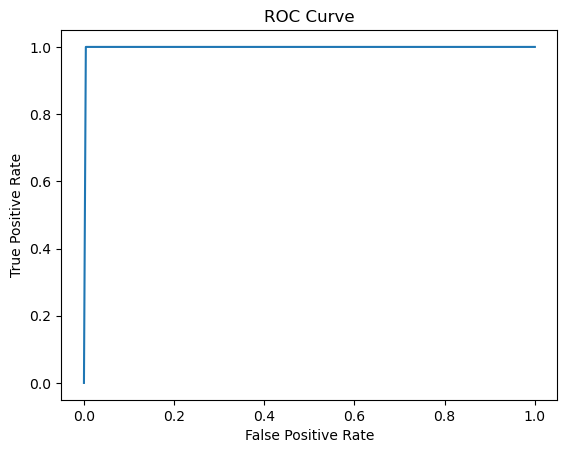

In [153]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
# Create the ROC curve
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()


#### Comments:
##### The predictions are perfect. It is giving exact predictions with perfect scores ,but are we sure about the robustness of the model?
1. Such high metrics could indicate overfitting to the training data.2. Model might have memorized the synthetic examples created by SMOTE.
It’s essential to evaluate the model on an unseen test set (not just the oversampled data) to assess its true performance.

### Approach-2 : Unsupervised Learning. 
Can we try out unsupervised learning on this data? if so on what basis are we going to do?.
#### Comments
1. The range of the data is 6863-6873.And manuever also are in the same range, more over the data points are continous(to some extent), hence unsupervised learning methods like K-means, DBSCAN will not be appropriate here.

In [1]:
!export PATH=/Library/TeX/texbin:$PATH

'export' is not recognized as an internal or external command,
operable program or batch file.
